Describing the position<br>
<b><u>Coordinates:</u></b>
    <b>40°20'10.9"N 74°33'40.8"W</b>
    
<b><u>Describe the average acoustic conditions around the system:</u></b><br>
    Unfortunately, the only place I could do this recording was at home. I live in Plainsboro, NJ in a very quiet place, but very close to a main road. So I put my computer in the exterior.<br>
    My first try was record all night long (12 hours of recording) starting on May 31st at 3:02 a.m. wich leaded me to a very big file. I misunderstood what I need to record. Next, my second try was when I started  recording on Jun 2nd at 1:00 a.m., but I mistook my code again and still not getting all information, so finally I started recording on June 4th at 7:26 p.m. approximately.<br>
Recording at home leads to a lot of Biases, specially from my family. Even, with the correction in the recording algorithm, I could just record what it is needed. Nothing at night, but a lot of noise starting at 7 a.m.
All this factors leaded to a very small (in file size) sampling data files. It was too small to get information about the label, start and end.
Attached Images of location.

In [1]:
%matplotlib inline
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.patches import Ellipse
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import mpld3
import os
from datetime import datetime,timedelta
import wave
import pandas as pd

In [2]:
#Take all Recordings and its time (in the name with the format: YearMonthDayHourMinuteSecondMicrosecond.wav)
audio = pd.read_csv('RecordedAudio.csv')
audio.head()

/Users/arp504/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/arp504/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


,Unnamed: 0,RMS,Recording,TimeStamp
0,0,0.002701,False,20160604192645898405
1,1,0.001378,False,20160604192646898496
2,2,0.003121,False,20160604192647898522
3,3,0.001109,False,20160604192648898506
4,4,0.001273,False,20160604192649898639


In [3]:
mpld3.enable_notebook()
pylab.rcParams['figure.figsize'] = 12, 8
pylab.rcParams['font.size'] = 16

In [4]:
Y = audio.RMS
audio['Time'] = pd.to_datetime(audio['TimeStamp'],format = '%Y%m%d%H%M%S%f')
X = audio.Time
Ymin = [pow(10,-36/20)] * len(X)

In [5]:
#I tryed to do at Seconds resolution, but it is too heavy, insted, I used Minutes Resolution, with both, Max and Mean
#Values for RMS

#fig, ax = plt.subplots(figsize=(12, 8))
#ax.plot_date(X,Y,marker='o',ms=3,c='b',linestyle='-',label='RMS level')
#ax.plot_date(X,Ymin,'-r',label='RMS Thereshold')

#ax.xaxis.set_major_locator(HourLocator(np.arange(0, 25, 1)))
#ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

#ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
#fig.autofmt_xdate()

#ax.set_title('RMS amplitude data')
#ax.set_xlabel('Time (hours)\n Resolution: Seconds')
#ax.set_ylabel('RMS Amplitude')
#ax.legend()
#plt.show();

In [6]:
#Change Resolution To Minutes
audio2 = audio
audio2['TimeMin'] = audio2['Time'].apply(lambda x: x.replace( second = 0, microsecond = 0))
audio2['RMS2'] = audio2['RMS']**2
audio2.head()

,Unnamed: 0,RMS,Recording,TimeStamp,Time,TimeMin,RMS2
0,0,0.002701,False,20160604192645898405,2016-06-04 19:26:45.898405,2016-06-04 19:26:00,0.000007
1,1,0.001378,False,20160604192646898496,2016-06-04 19:26:46.898496,2016-06-04 19:26:00,0.000002
2,2,0.003121,False,20160604192647898522,2016-06-04 19:26:47.898522,2016-06-04 19:26:00,0.000010
3,3,0.001109,False,20160604192648898506,2016-06-04 19:26:48.898506,2016-06-04 19:26:00,0.000001
4,4,0.001273,False,20160604192649898639,2016-06-04 19:26:49.898639,2016-06-04 19:26:00,0.000002


In [7]:
audiomin = audio2.groupby(['TimeMin']).agg({'RMS2' : {np.mean,np.max}})
audiomin = audiomin.reset_index()
audiomin.columns = audiomin.columns.droplevel(1)
audiomin.columns = ['TimeMin','RMS2Max','RMS2Mean']
audiomin['RMSMax'] = audiomin['RMS2Max'] ** (0.5)
audiomin['RMSMean'] = audiomin['RMS2Mean'] ** (0.5)
audiomin.head()

,TimeMin,RMS2Max,RMS2Mean,RMSMax,RMSMean
0,2016-06-04 19:26:00,0.000010,0.000004,0.003121,0.001885
1,2016-06-04 19:27:00,0.000023,0.000003,0.004819,0.001685
2,2016-06-04 19:28:00,0.000007,0.000002,0.002737,0.001401
3,2016-06-04 19:29:00,0.000006,0.000002,0.002413,0.001420
4,2016-06-04 19:30:00,0.000004,0.000002,0.002114,0.001346


In [8]:
Y1 = audiomin.RMSMean
Y2 = audiomin.RMSMax
X = list(audiomin.TimeMin)
Ymin = [pow(10,-36/20)] * len(X)

In [9]:
WavFilesStr = []
for root, dirs, files in os.walk("./"):
    for name in files:
        if name[-4:] == '.wav':
            WavFilesStr.append(name)
    break 

duration = 12       # hours
sample_rate = 44100 # samples per second
initial_time = min(audio['Time'])
final_time = max(audio['Time'])
seconds = int((final_time-initial_time).total_seconds())
#X2 = np.linspace(0,duration,num=seconds)
# Initialize the Amplitude analysis
#Y = [0.0] * seconds

WavDurations = []
WavInitialDate = []
WavFinalDate = []
WavRMS = []
for archive in WavFilesStr:
    fs, samples = wavfile.read(archive)
    nsamples = len(samples)
    nseconds = nsamples / 44100
    WavDurations.append(nsamples * 1.0 / 44100)
    StartingTime = datetime.strptime(archive[:-4],'%Y%m%d%H%M%S%f')
    WavInitialDate.append(StartingTime)
    secs = np.floor(nsamples *1.0 / 44100 )
    microsecs = (nsamples * 1000000.0 / 44100) - secs * 1000000.0
    WavFinalDate.append(StartingTime + timedelta(seconds=secs,microseconds=microsecs))
    StartingPoint = int(seconds * (StartingTime.replace(microsecond=0) - initial_time).total_seconds() / (final_time - initial_time).total_seconds())
    audio_data = np.fromstring(samples, dtype=np.int16) / 32767.0
    rms = np.sqrt(np.mean(np.square(audio_data)))
    WavRMS.append(rms)
    #print "Processing File that starts at {0}, with {1} samples".format(StartingTime.strftime('%c'),nsamples)
    #for i in range(0,nseconds):
        #Y[i + StartingPoint] = rms
    
WavData = pd.DataFrame({"InitialTime":WavInitialDate,"FinalTime":WavFinalDate,"Duration":WavDurations,"RMS":WavRMS,"FileName":WavFilesStr})

/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil

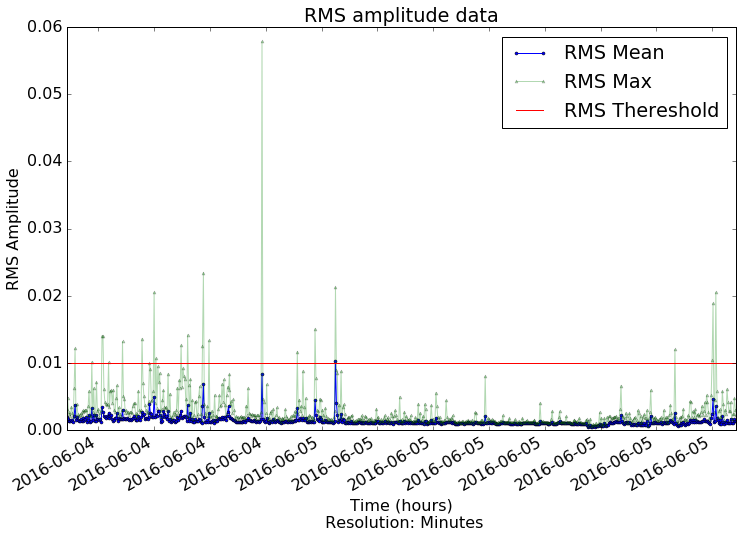

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot_date(audiomin.TimeMin,Y1,marker='o',ms=3,c='b',linestyle='-',label='RMS Mean')
ax.plot_date(audiomin.TimeMin,Y2,marker='^',ms=3,c='g',linestyle='-',label='RMS Max',alpha=0.3)
ax.plot_date(audiomin.TimeMin,Ymin,'-r',label='RMS Thereshold')

ax.xaxis.set_major_locator(HourLocator(np.arange(0, 25, 1)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()

ax.set_title('RMS amplitude data')
ax.set_xlabel('Time (hours)\n Resolution: Minutes')
ax.set_ylabel('RMS Amplitude')
ax.legend()
plt.show();

/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil

TypeError: Timestamp('2016-06-04 19:35:00') is not JSON serializable

/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/Users/arp504/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


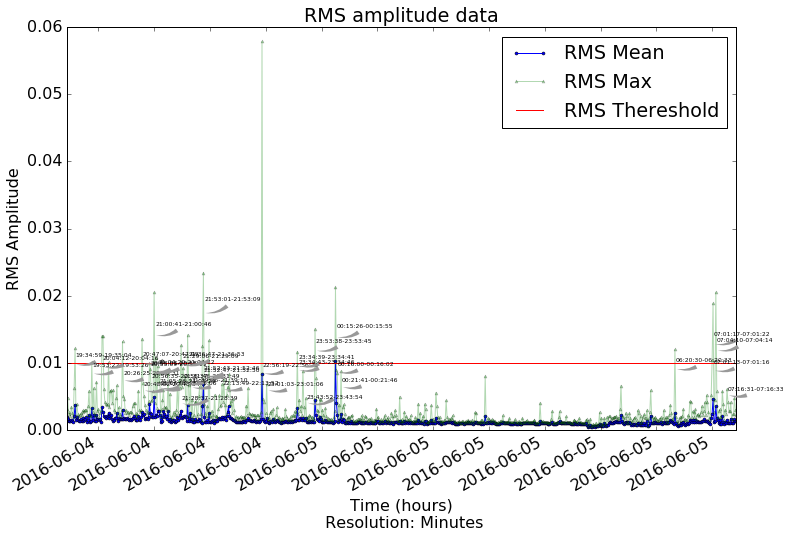

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot_date(audiomin.TimeMin,Y1,marker='o',ms=3,c='b',linestyle='-',label='RMS Mean')
ax.plot_date(audiomin.TimeMin,Y2,marker='^',ms=3,c='g',linestyle='-',label='RMS Max',alpha=0.3)
ax.plot_date(audiomin.TimeMin,Ymin,'-r',label='RMS Thereshold')

ax.xaxis.set_major_locator(HourLocator(np.arange(0, 25, 1)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()

ax.set_title('RMS amplitude data')
ax.set_xlabel('Time (hours)\n Resolution: Minutes')
ax.set_ylabel('RMS Amplitude')
for elem in WavData.iterrows():
    el = Ellipse((2, -1), 0.5, 0.5)
    #if elem[0] == 0:
    posX = X.index(elem[1].InitialTime.replace(second=0,microsecond=0))
    posY = elem[1].RMS
    #print X[posX],X[posX + 1],posY
    ax.annotate('{0}-{1}'.format(elem[1].InitialTime.strftime('%H:%M:%S'),elem[1].FinalTime.strftime('%H:%M:%S')),
                xy=(X[posX], posY), xytext=(X[posX+1], posY*1.1),fontsize=6, xycoords='data',
                #arrowprops=dict(arrowstyle="-|>"))
                arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
                                fc="0.6", ec="none",
                                patchB=el,
                                connectionstyle="arc3,rad=-0.3"))

ax.legend()
plt.show();

In [ ]:
#Last Try of labeling each recording. The first one was with hours, there is an error I couldn't find yet.